In [2]:
# Find an analytic solution to the problem (simpler that notebook "b")

from sympy import symbols, Eq, nonlinsolve, sin, cos, pi, S
a_vx, a_vy, a_m, ahat_vx, ahat_vy =  symbols("a_vx, a_vy, a_m, ahat_vx, ahat_vy")
b_vx, b_vy, b_m, bhat_vx, bhat_vy =  symbols("b_vx, b_vy, b_m, bhat_vx, bhat_vy")
c_vx, c_vy, c_m, chat_vx, chat_vy =  symbols("c_vx, c_vy, c_m, chat_vx, chat_vy")

# conservation of energy
a_m, b_m, c_m = 1, 1, 1
a_vx, b_vx, c_vx = 1, 0, 0
a_vy, b_vy, c_vy = S(0), S(0), S(0)
energy_before = a_m * (a_vx**2 + a_vy**2) / 2 + b_m * (b_vx**2 + b_vy**2) / 2 + c_m * (c_vx**2 + c_vy**2) / 2
energy_after = a_m * (ahat_vx**2 + ahat_vy**2) / 2 + b_m * (bhat_vx**2 + bhat_vy**2) / 2 + c_m * (chat_vx**2 + chat_vy**2) / 2
eq1 = Eq(energy_before*2, energy_after*2)
# conservation of momentum
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq3 = Eq(a_m * a_vy + b_m * b_vy + c_m * c_vy, a_m * ahat_vy + b_m * bhat_vy + c_m * chat_vy)

# always 30 degrees up or down
eq4 = Eq(bhat_vx / cos(pi/6), bhat_vy / sin(pi/6))
eq5 = Eq(chat_vx / cos(-pi/6), chat_vy / sin(-pi/6))

minipool = nonlinsolve([eq1, eq2, eq3, eq4, eq5], [ahat_vx, bhat_vx, bhat_vy, chat_vx, chat_vy])
minipool

{(-(3*sqrt(1 - 5*ahat_vy**2) - 2)/5, -sqrt(3)*ahat_vy/2 + 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 + sqrt(3 - 15*ahat_vy**2)/10 + sqrt(3)/10, sqrt(3)*ahat_vy/2 + 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 - sqrt(3)*sqrt(1 - 5*ahat_vy**2)/10 - sqrt(3)/10), ((3*sqrt(1 - 5*ahat_vy**2) + 2)/5, -sqrt(3)*ahat_vy/2 - 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 - sqrt(3 - 15*ahat_vy**2)/10 + sqrt(3)/10, sqrt(3)*ahat_vy/2 - 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 + sqrt(3)*sqrt(1 - 5*ahat_vy**2)/10 - sqrt(3)/10)}

In [3]:
y =  symbols("y", real=True)
vxs = [vx.subs(ahat_vy, y) for vx, _, _, _, _ in minipool]
print(vxs)
vxs[0]

[2/5 - 3*sqrt(1 - 5*y**2)/5, 3*sqrt(1 - 5*y**2)/5 + 2/5]


2/5 - 3*sqrt(1 - 5*y**2)/5

In [7]:
import sympy as sp
from IPython.display import display

vxs_im = [sp.im(vx) for vx in vxs]
print(vxs_im)
display(vxs_im[0],vxs_im[1])

[-3*sin(atan2(0, 1 - 5*y**2)/2)*sqrt(Abs(5*y**2 - 1))/5, 3*sin(atan2(0, 1 - 5*y**2)/2)*sqrt(Abs(5*y**2 - 1))/5]


-3*sin(atan2(0, 1 - 5*y**2)/2)*sqrt(Abs(5*y**2 - 1))/5

3*sin(atan2(0, 1 - 5*y**2)/2)*sqrt(Abs(5*y**2 - 1))/5

In [8]:
def flat2(list_of_lists):
    return list(set(element for sublist in list_of_lists for element in sublist))

In [9]:
y_ex = flat2([sp.solve(vx_im, y) for vx_im in vxs_im])
print(y_ex)
y_ex[0]

[sqrt(5)/5, -sqrt(5)/5]


sqrt(5)/5

In [10]:
x =  symbols("x", real=True)
vys = [sp.solve(Eq(vx, ahat_vx), ahat_vy) for vx, _, _, _, _ in minipool]
vys = [vy.subs(ahat_vx, x) for vy in flat2(vys)]
print(vys)
vys[0]

[-sqrt(-5*x**2 + 4*x + 1)/3, sqrt(-5*x**2 + 4*x + 1)/3]


-sqrt(-5*x**2 + 4*x + 1)/3

In [11]:
vys_im = [sp.im(vy) for vy in vys]
print(vys_im)
vys_im[0]

[-sin(atan2(0, -5*x**2 + 4*x + 1)/2)*sqrt(Abs(-5*x**2 + 4*x + 1))/3, sin(atan2(0, -5*x**2 + 4*x + 1)/2)*sqrt(Abs(-5*x**2 + 4*x + 1))/3]


-sin(atan2(0, -5*x**2 + 4*x + 1)/2)*sqrt(Abs(-5*x**2 + 4*x + 1))/3

In [12]:
x_ex = flat2([sp.solve(vy_im, x) for vy_im in vys_im])
print(x_ex)
x_ex[0]

[1, -1/5]


1

In [13]:
vys

[-sqrt(-5*x**2 + 4*x + 1)/3, sqrt(-5*x**2 + 4*x + 1)/3]

In [16]:
h = (x_ex[0]+x_ex[1])/2
k = (y_ex[0]+y_ex[1])/2
a = abs(x_ex[0]-x_ex[1])/2
b = abs(y_ex[0]-y_ex[1])/2
print(h, k, a, b)
ellipse_eq = sp.Eq(((x - h)**2 / a**2) + ((y - k)**2 / b**2), 1)
ellipse_eq_hat = sp.Eq(ellipse_eq.lhs.subs(y,ahat_vy).subs(x,ahat_vx),1)
print(ellipse_eq_hat)
display(ellipse_eq_hat)
print(sp.latex(ellipse_eq_hat))

2/5 0 3/5 sqrt(5)/5
Eq(5*ahat_vy**2 + 25*(ahat_vx - 2/5)**2/9, 1)


Eq(5*ahat_vy**2 + 25*(ahat_vx - 2/5)**2/9, 1)

5 \hat{a}_{vy}^{2} + \frac{25 \left(\hat{a}_{vx} - \frac{2}{5}\right)^{2}}{9} = 1


In [75]:
((sp.simplify(Eq(sp.solve(ellipse_eq,y)[0], vys[0]))
and sp.simplify(Eq(sp.solve(ellipse_eq,y)[1], vys[1])))
or
(sp.simplify(Eq(sp.solve(ellipse_eq,y)[0], vys[1]))
and sp.simplify(Eq(sp.solve(ellipse_eq,y)[1], vys[0]))))

True

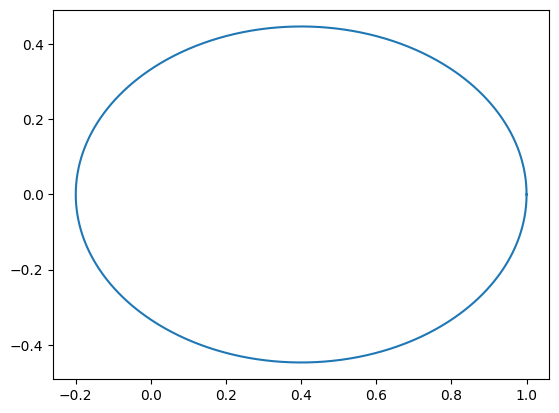

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of values for the parameter t
t = np.linspace(0, 2 * np.pi, 1000)

# Calculate the x and y coordinates using the parametric equations
# Plot the ellipse
plt.plot(h + a * np.cos(t), k + b * np.sin(t))

# Customize the plot (optional)
plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio

# Display the plot
plt.show()
